# Identificação

    💻💻Alunos: Rodrigo de Oliveira Rodrigues e Tiago Rodrigues de Souza💻💻
    💻💻Disciplina: Disciplina:**Visualização de Dados e Data Storytelling💻💻
    💻💻Professor: Felipe Timbó💻💻

    Python notebook: https://colab.research.google.com/drive/1gSFkM30d-FlSXPMb-G22z7NXROWGVhED?usp=sharing



# Folha de Pagamento

🗂️ Contexto da Base de Dados
A base de dados _folha.csv simula um ambiente corporativo com 1.000 registros de funcionários de uma empresa fictícia. Ela foi elaborada com o objetivo de refletir aspectos típicos de gestão de pessoas, departamentos, cargos e remuneração, permitindo análises exploratórias, diagnósticos de qualidade de dados (valores nulos, outliers) e simulações de processos de RH e controle financeiro.

🔍 Objetivo Geral
A base pode ser utilizada para:

Explorar características demográficas e funcionais dos colaboradores;

Analisar a distribuição salarial e sua relação com outros atributos (cargo, escolaridade, horas trabalhadas);

Identificar inconsistências ou padrões nos dados (como valores ausentes e discrepantes);

Realizar simulações de políticas de RH, como bonificações ou jornadas de trabalho;

Aplicar técnicas de análise de dados, visualização e machine learning (ex: previsão de salários, clusterização de perfis, etc.).

📌 Características da Base
Volume: 1.000 funcionários.

Estrutura: 10 atributos, sendo alguns com valores nulos e outros com inserções propositais de outliers.

Dados sintéticos: Nenhuma informação é real, permitindo uso livre para fins educacionais e testes analíticos.

## Definição dos Atributos (Dicionário de dados)

**Matricula**: Identificador único de cada funcionário, gerado como um código numérico de 4 dígitos, começando de "0001" até "1000".

**N**ome: Nome fictício do funcionário, no formato "Funcionário N", onde N varia de 1 a 1000. Este campo é meramente representativo.

**Genero**: Categoria de gênero, contendo valores "Masculino", "Feminino" ou "Não Informado", com distribuição aleatória entre os funcionários.

**Departamento**: Setor ao qual o funcionário pertence, distribuído entre as categorias: Financeiro; RH (Recursos Humanos); TI (Tecnologia da Informação); Marketing; Operações. Em alguns registros, valores nulos foram inseridos para simular casos onde o departamento pode não estar especificado.

**Cargo**: Posição ou função do funcionário dentro da empresa, compatível com o departamento. As categorias de cargos são: Analista; Gerente; Assistente; Diretor; Coordenador. Há registros com valores nulos para simular dados incompletos.

**Formacao**: Formação acadêmica do funcionário, relacionada ao departamento Departamentos e suas formações associadas: Financeiro: Contabilidade, Administração, Economia; RH: Psicologia, Administração, Recursos Humanos; TI: Engenharia da Computação, Ciência da Computação, Sistemas de Informação
Marketing: Marketing, Publicidade e Propaganda, Comunicação Social; Operações: Engenharia de Produção, Logística, Administração. Valores nulos foram inseridos para simular lacunas nesses dados.

**Escolaridade**: Nível de escolaridade do funcionário, com categorias que incluem: Ensino Médio; Tecnólogo; Graduação; Pós-graduação; Mestrado. Distribuição aleatória sem relação direta com o cargo ou departamento. Este campo não possui valores nulos.

**Salario_Bruto**: Valor bruto do salário do funcionário, gerado com uma média de RS 5.000,00 e desvio padrão de RS 1.500,00. Mas, inclui alguns valores nulos para simular registros incompletos. Em cerca de 1% dos casos, valores atípicos foram inseridos (outliers), aumentando o salário para até 10 ou 15 vezes o valor original.

Horas_Trabalhadas: Número médio de horas trabalhadas no mês, com média de 160 horas e desvio padrão de 20 horas. Em alguns registros, outliers foram adicionados, aumentando as horas trabalhadas para até 5 ou 10 vezes o valor típico, e valores nulos foram inseridos para simular dados faltantes.

**Bonificacao**: Valor das bonificações recebidas pelos funcionários, com média de RS 500,00 e desvio padrão de RS 200,00. Outliers foram inseridos em cerca de 1% dos casos, aumentando o valor da bonificação em até 3 ou 5 vezes. Há também valores nulos, indicando registros sem informações de bonificação. Algumas bonificações estão com valores negativos devido a política da empresa que caso o funcionário receba a bonificação antecipada ou houve necessidade de corrigir algum valor.

## Importar as Bibliotecas

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Obter o Datasource

In [ ]:
# Carregar datasource do GoogleDrivedeu err
dataset = pd.read_csv("https://drive.google.com/uc?id=1P1NJJVsr_XRA2D98J9DV4DaNi4-1uhMG", sep=';')

## Exibir os Dados, Metadados e Estatísticas

In [ ]:
# Explorar os metadados do dataset
print("Exploração dos Metadados do Dataset")

# Exibir o DataFrame
print("Dados do Dataset:")
print(dataset.head().to_string())

Exploração dos Metadados do Dataset
Dados do Dataset:
   Matricula           Nome         Genero Departamento        Cargo                Formacao   Escolaridade  Salario_Bruto  Horas_Trabalhadas  Bonificacao
0          1  Funcionário 1       Feminino    Operações      Diretor  Engenharia de Produção  Pós-graduação            NaN              139.9       315.92
1          2  Funcionário 2       Feminino   Financeiro     Analista           Administração  Pós-graduação        5128.93              117.1       467.94
2          3  Funcionário 3  Não Informado    Marketing   Assistente               Marketing       Mestrado        6127.92              195.9          NaN
3          4  Funcionário 4  Não Informado    Marketing  Coordenador               Marketing      Tecnólogo        5844.48              155.9       199.47
4          5  Funcionário 5  Não Informado    Marketing      Gerente      Comunicação Social      Graduação        3207.52              151.0       318.89


In [ ]:
# Obter informações gerais do dataset
print("Informações Gerais do Dataset:")
print(dataset.info())

Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Matricula          1000 non-null   int64  
 1   Nome               1000 non-null   object 
 2   Genero             1000 non-null   object 
 3   Departamento       900 non-null    object 
 4   Cargo              900 non-null    object 
 5   Formacao           900 non-null    object 
 6   Escolaridade       1000 non-null   object 
 7   Salario_Bruto      900 non-null    float64
 8   Horas_Trabalhadas  900 non-null    float64
 9   Bonificacao        900 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB
None


In [ ]:
# Exibir o número de linhas e colunas
print("Dimensões do Dataset (Linhas, Colunas):")
print(dataset.shape)

Dimensões do Dataset (Linhas, Colunas):
(1000, 10)


In [ ]:
# Exibir o nome das colunas
print("Nomes das Colunas:")
print(dataset.columns.tolist())

Nomes das Colunas:
['Matricula', 'Nome', 'Genero', 'Departamento', 'Cargo', 'Formacao', 'Escolaridade', 'Salario_Bruto', 'Horas_Trabalhadas', 'Bonificacao']


In [ ]:
# Checar dados ausentes por coluna
print("Dados Ausentes por Coluna:")
print(dataset.isnull().sum())

Dados Ausentes por Coluna:
Matricula              0
Nome                   0
Genero                 0
Departamento         100
Cargo                100
Formacao             100
Escolaridade           0
Salario_Bruto        100
Horas_Trabalhadas    100
Bonificacao          100
dtype: int64


In [ ]:
# Exibir tipos de dados de cada coluna
print("Tipos de Dados das Colunas:")
print(dataset.dtypes)

Tipos de Dados das Colunas:
Matricula              int64
Nome                  object
Genero                object
Departamento          object
Cargo                 object
Formacao              object
Escolaridade          object
Salario_Bruto        float64
Horas_Trabalhadas    float64
Bonificacao          float64
dtype: object


In [ ]:
# Exibir estatísticas descritivas para colunas numéricas
print("Estatísticas Descritivas das Colunas Numéricas:")
print(dataset.describe().to_string())

Estatísticas Descritivas das Colunas Numéricas:
         Matricula  Salario_Bruto  Horas_Trabalhadas  Bonificacao
count  1000.000000     900.000000         900.000000   900.000000
mean    500.500000    5599.508789         175.209222   516.953511
std     288.819436    6852.542095         161.033291   284.804903
min       1.000000     324.720000         103.800000  -248.020000
25%     250.750000    3911.505000         145.300000   357.205000
50%     500.500000    5027.105000         158.800000   505.950000
75%     750.250000    5971.157500         171.700000   644.985000
max    1000.000000   88485.750000        2067.000000  3441.350000


In [ ]:
# Exibir domínios por coluna para colunas categóricas
print("Domínios por Coluna Categórica:")
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"{col}: {dataset[col].nunique()} valores únicos")

Domínios por Coluna Categórica:
Nome: 1000 valores únicos
Genero: 3 valores únicos
Departamento: 5 valores únicos
Cargo: 5 valores únicos
Formacao: 13 valores únicos
Escolaridade: 6 valores únicos


In [ ]:
# Exibir domínios por coluna para colunas categóricas, excluindo a coluna 'Nome'
print("Valores únicos dos domínios por Coluna Categórica:")
for col in dataset.select_dtypes(include=['object']).columns:
  if col != 'Nome':
    print(f"Valores únicos da coluna '{col}':")
    print(dataset[col].unique())

Valores únicos dos domínios por Coluna Categórica:
Valores únicos da coluna 'Genero':
['Feminino' 'Não Informado' 'Masculino']
Valores únicos da coluna 'Departamento':
['Operações' 'Financeiro' 'Marketing' 'RH' 'TI' nan]
Valores únicos da coluna 'Cargo':
['Diretor' 'Analista' 'Assistente' 'Coordenador' 'Gerente' nan]
Valores únicos da coluna 'Formacao':
['Engenharia de Produção' 'Administração' 'Marketing' 'Comunicação Social'
 'Psicologia' 'Engenharia da Computação' 'Economia' 'Logística'
 'Recursos Humanos' nan 'Sistemas de Informação'
 'Publicidade e Propaganda' 'Contabilidade' 'Ciência da Computação']
Valores únicos da coluna 'Escolaridade':
['Pós-graduação' 'Mestrado' 'Tecnólogo' 'Graduação' 'Ensino Médio'
 'Doutorado']


## Extract, Transform, Load (ETL)

In [ ]:
# Preencher valores nulos em 'Departamento' com a moda
departamento_moda = dataset['Departamento'].mode()[0]
dataset['Departamento'] = dataset['Departamento'].fillna(departamento_moda)

# Preencher valores nulos em 'Cargo' com a moda
cargo_moda = dataset['Cargo'].mode()[0]
dataset['Cargo'] = dataset['Cargo'].fillna(cargo_moda)

# Preencher valores nulos em 'Formacao' com a moda
formacao_moda = dataset['Formacao'].mode()[0]
dataset['Formacao'] = dataset['Formacao'].fillna(formacao_moda)

# Preencher valores nulos em 'Salario_Bruto' com a média
salario_medio = dataset['Salario_Bruto'].mean()
dataset['Salario_Bruto'] = dataset['Salario_Bruto'].fillna(salario_medio)

# Preencher valores nulos em 'Horas_Trabalhadas' com a média
horas_trabalhadas_media = dataset['Horas_Trabalhadas'].mean()
dataset['Horas_Trabalhadas'] = dataset['Horas_Trabalhadas'].fillna(horas_trabalhadas_media)

# Preencher valores nulos em 'Bonificacao' com o mínimo
bonificacao_min = dataset['Bonificacao'].min()
dataset['Bonificacao'] = dataset['Bonificacao'].fillna(bonificacao_min)

# Exibir os dados após a substituição
print("\nValores nulos após a substituição:")
print(dataset.isnull().sum())

# Exibir o dataset atualizado para confirmar as transformações
print("\nDataset atualizado:")
print(dataset.head().to_string())


Valores nulos após a substituição:
Matricula            0
Nome                 0
Genero               0
Departamento         0
Cargo                0
Formacao             0
Escolaridade         0
Salario_Bruto        0
Horas_Trabalhadas    0
Bonificacao          0
dtype: int64

Dataset atualizado:
   Matricula           Nome         Genero Departamento        Cargo                Formacao   Escolaridade  Salario_Bruto  Horas_Trabalhadas  Bonificacao
0          1  Funcionário 1       Feminino    Operações      Diretor  Engenharia de Produção  Pós-graduação    5599.508789              139.9       315.92
1          2  Funcionário 2       Feminino   Financeiro     Analista           Administração  Pós-graduação    5128.930000              117.1       467.94
2          3  Funcionário 3  Não Informado    Marketing   Assistente               Marketing       Mestrado    6127.920000              195.9      -248.02
3          4  Funcionário 4  Não Informado    Marketing  Coordenador            

## Exploratory Data Analysis (EDA)

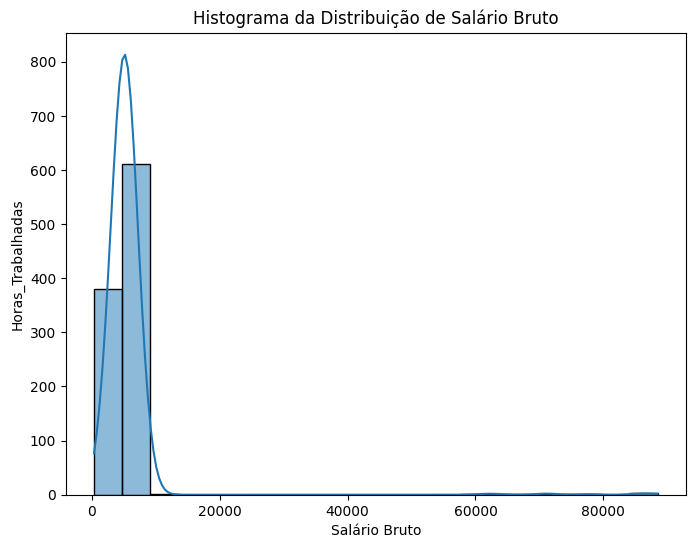

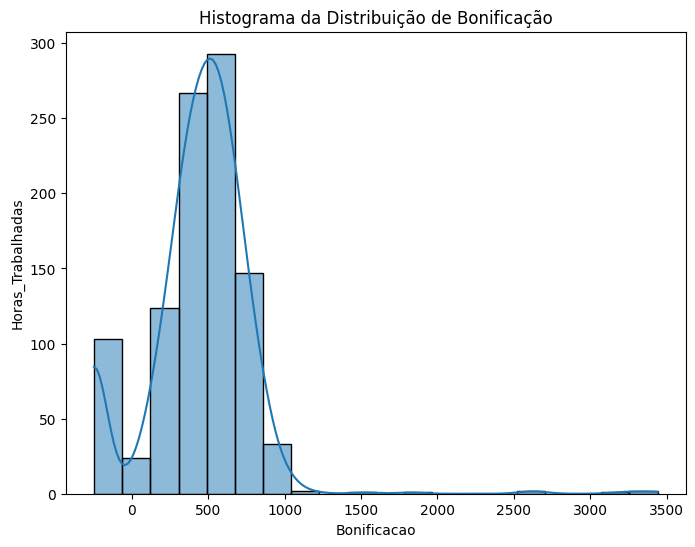

In [ ]:


# Histograma para Salário Bruto
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Salario_Bruto'], bins=20, kde=True)
plt.title('Histograma da Distribuição de Salário Bruto')
plt.xlabel('Salário Bruto')
plt.ylabel('Horas_Trabalhadas')
plt.show()


# Histograma para Escolaridade
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Bonificacao'], bins=20, kde=True)
plt.title('Histograma da Distribuição de Bonificação')
plt.xlabel('Bonificacao')
plt.ylabel('Horas_Trabalhadas')
plt.show()


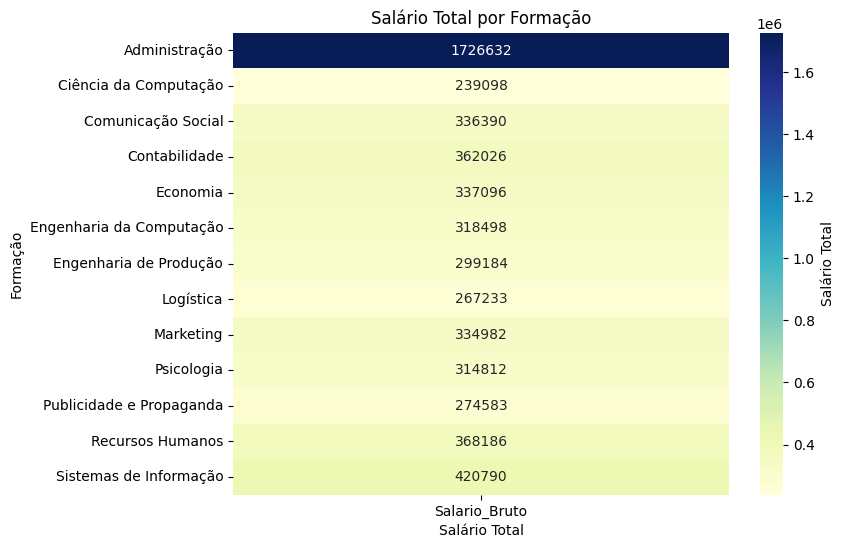

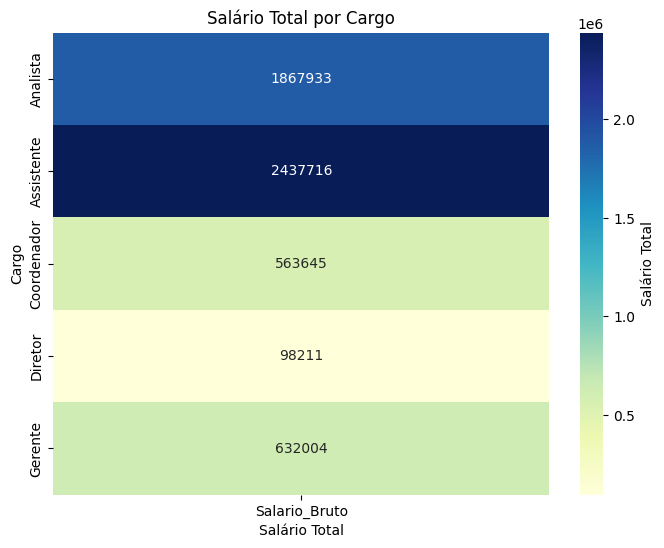

In [ ]:
# Criar tabela dinâmica de salário por formação
salario_formacao = pd.pivot_table(dataset, values='Salario_Bruto', index='Formacao', aggfunc='sum')

# Plotar o gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(salario_formacao, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Salário Total'})
plt.title('Salário Total por Formação')
plt.ylabel('Formação')
plt.xlabel('Salário Total')
plt.show()

# Criar tabela dinâmica de salário por cargo
salario_cargo = pd.pivot_table(dataset, values='Salario_Bruto', index='Cargo', aggfunc='sum')

# Plotar o gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(salario_cargo, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Salário Total'})
plt.title('Salário Total por Cargo')
plt.ylabel('Cargo')
plt.xlabel('Salário Total')
plt.show()


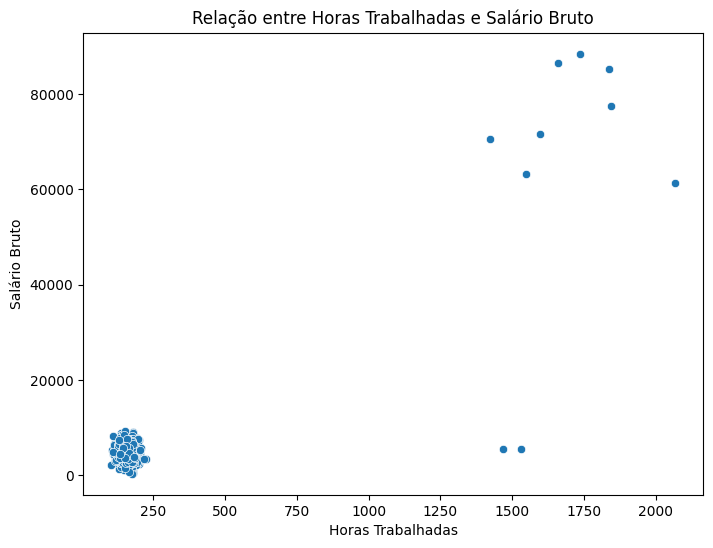

In [ ]:
# Gráfico de dispersão para Salário Bruto e Horas Trabalhadas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['Horas_Trabalhadas'], y=dataset['Salario_Bruto'])
plt.title('Relação entre Horas Trabalhadas e Salário Bruto')
plt.xlabel('Horas Trabalhadas')
plt.ylabel('Salário Bruto')
plt.show()


Tipos de Dados das Colunas:
Matricula              int64
Nome                  object
Genero                object
Departamento          object
Cargo                 object
Formacao              object
Escolaridade          object
Salario_Bruto        float64
Horas_Trabalhadas    float64
Bonificacao          float64
dtype: object


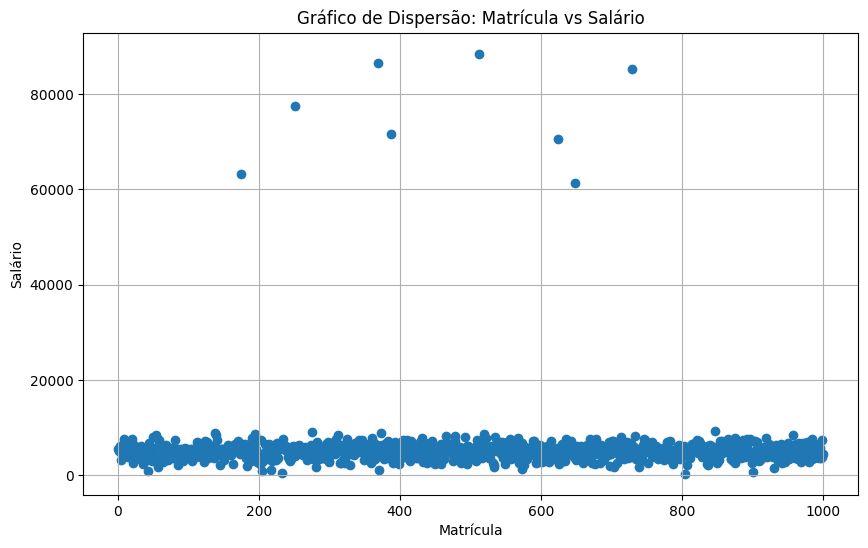

In [ ]:
# Exibir Metadados
print("\nTipos de Dados das Colunas:")
print(dataset.dtypes)

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Matricula'], dataset['Salario_Bruto'])
plt.xlabel('Matrícula')
plt.ylabel('Salário')
plt.title('Gráfico de Dispersão: Matrícula vs Salário')
plt.grid(True)
plt.show()

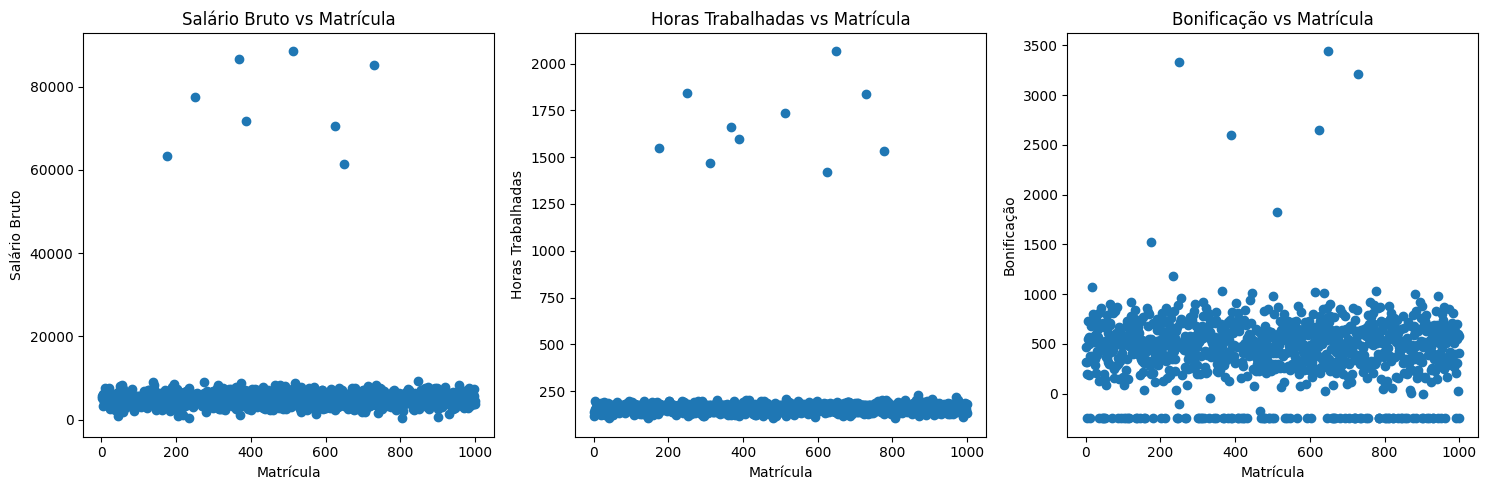

In [ ]:
# Criar gráficos de dispersão para 'Salario_Bruto', 'Horas_Trabalhadas' e 'Bonificacao' versus 'Matricula'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(dataset['Matricula'], dataset['Salario_Bruto'])
plt.xlabel('Matrícula')
plt.ylabel('Salário Bruto')
plt.title('Salário Bruto vs Matrícula')

plt.subplot(1, 3, 2)
plt.scatter(dataset['Matricula'], dataset['Horas_Trabalhadas'])
plt.xlabel('Matrícula')
plt.ylabel('Horas Trabalhadas')
plt.title('Horas Trabalhadas vs Matrícula')

plt.subplot(1, 3, 3)
plt.scatter(dataset['Matricula'], dataset['Bonificacao'])
plt.xlabel('Matrícula')
plt.ylabel('Bonificação')
plt.title('Bonificação vs Matrícula')

plt.tight_layout()
plt.show()

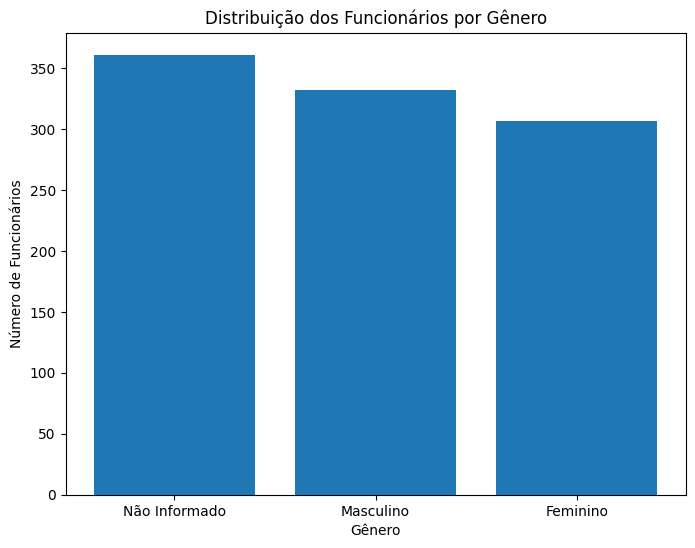

In [ ]:
# Contar a quantidade de matrículas por gênero
genero_counts = dataset['Genero'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(genero_counts.index, genero_counts.values)
plt.xlabel('Gênero')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição dos Funcionários por Gênero')
plt.show()

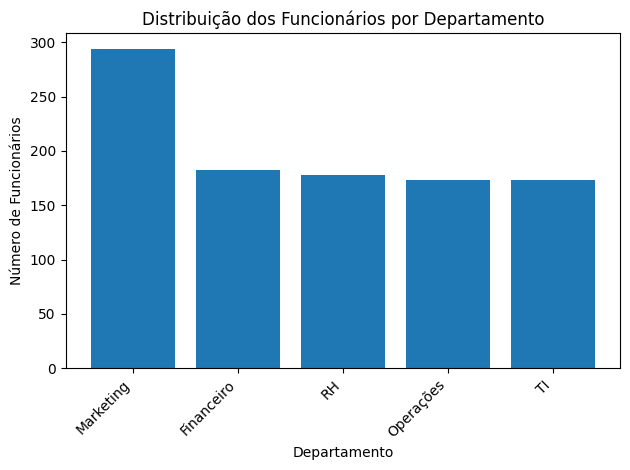

In [ ]:
# Gráfico de barras para 'Departamento'
departamento_counts = dataset['Departamento'].value_counts()
plt.bar(departamento_counts.index, departamento_counts.values)
plt.xlabel('Departamento')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição dos Funcionários por Departamento')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

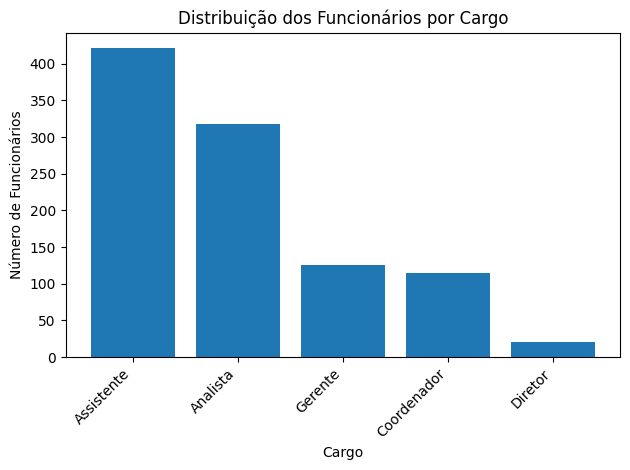

In [ ]:
# Gráfico de barras para 'Cargo'
cargo_counts = dataset['Cargo'].value_counts()
plt.bar(cargo_counts.index, cargo_counts.values)
plt.xlabel('Cargo')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição dos Funcionários por Cargo')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

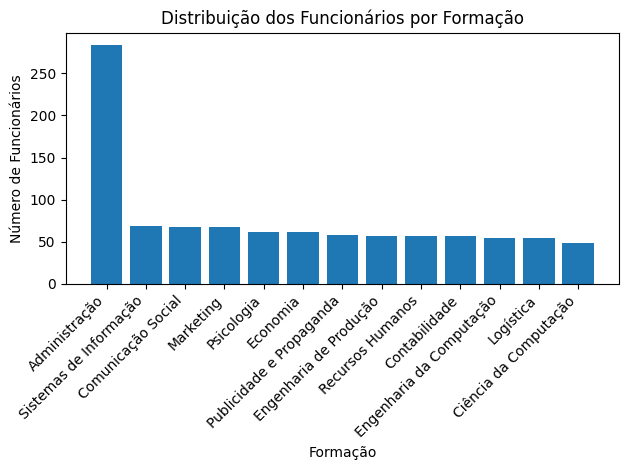

In [ ]:
# Gráfico de barras para 'Formacao'
formacao_counts = dataset['Formacao'].value_counts()
plt.bar(formacao_counts.index, formacao_counts.values)
plt.xlabel('Formação')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição dos Funcionários por Formação')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

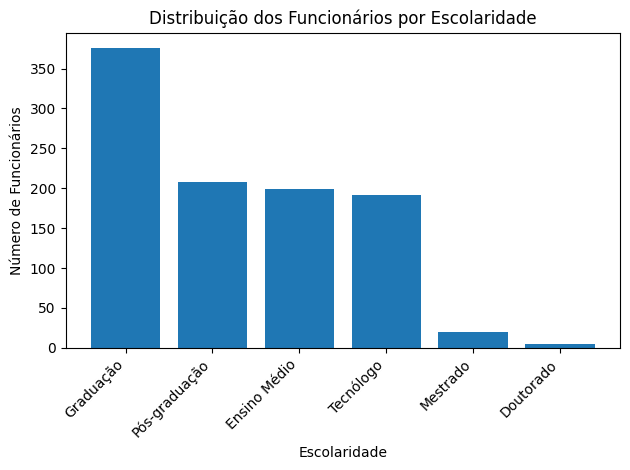

In [ ]:
# Gráfico de barras para 'Escolaridade'
escolaridade_counts = dataset['Escolaridade'].value_counts()
plt.bar(escolaridade_counts.index, escolaridade_counts.values)
plt.xlabel('Escolaridade')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição dos Funcionários por Escolaridade')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

## 🎯 Objetivos Analíticos do Projeto


Analisar a distribuição de funcionários por gênero e escolaridade
➤ Objetivo: entender a composição educacional da força de trabalho, segmentada por gênero.

Investigar a média salarial por cargo e departamento
➤ Objetivo: identificar possíveis disparidades ou padrões salariais entre cargos e setores.

Avaliar a relação entre horas trabalhadas e bonificação recebida
➤ Objetivo: verificar se há correlação entre o esforço mensal e o reconhecimento financeiro.

Identificar a presença de outliers nos salários e nas bonificações
➤ Objetivo: detectar registros fora do padrão que possam indicar erros ou exceções a serem analisadas.

Verificar a formação predominante em cada departamento
➤ Objetivo: compreender se os profissionais atuam em áreas compatíveis com sua formação acadêmica.

Comparar a distribuição de cargos entre os departamentos
➤ Objetivo: avaliar a estrutura hierárquica e funcional da empresa, verificando o balanceamento entre as áreas.

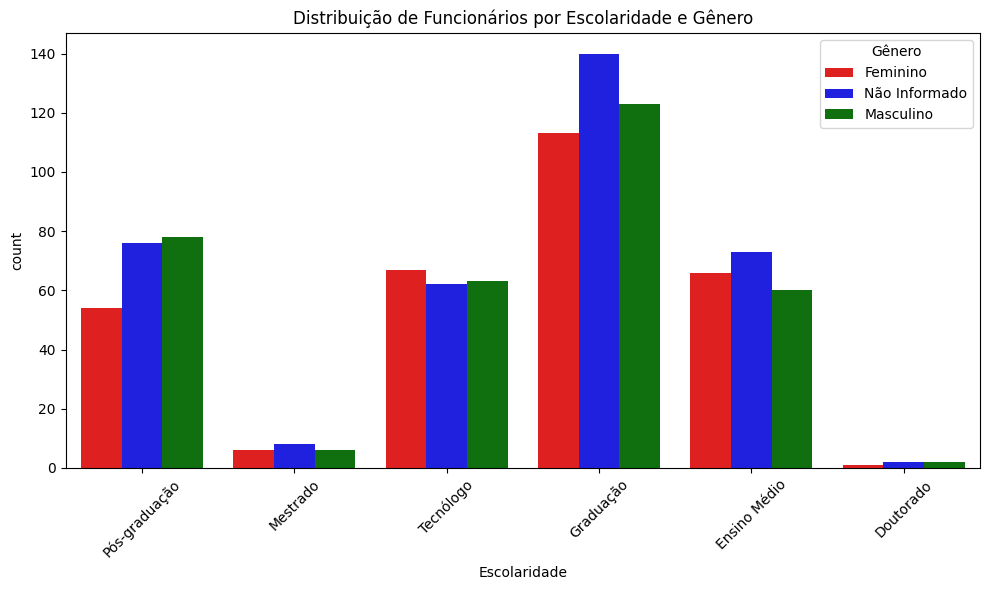

In [ ]:
# Distribuição por gênero e escolaridade
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Escolaridade', hue='Genero', palette=['red', 'blue', 'green'])
plt.title('Distribuição de Funcionários por Escolaridade e Gênero')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

<ipython-input-56-d489c3a2a784>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_salario, x='Cargo', y='Salario_Bruto', hue='Departamento', ci=None, palette='viridis')


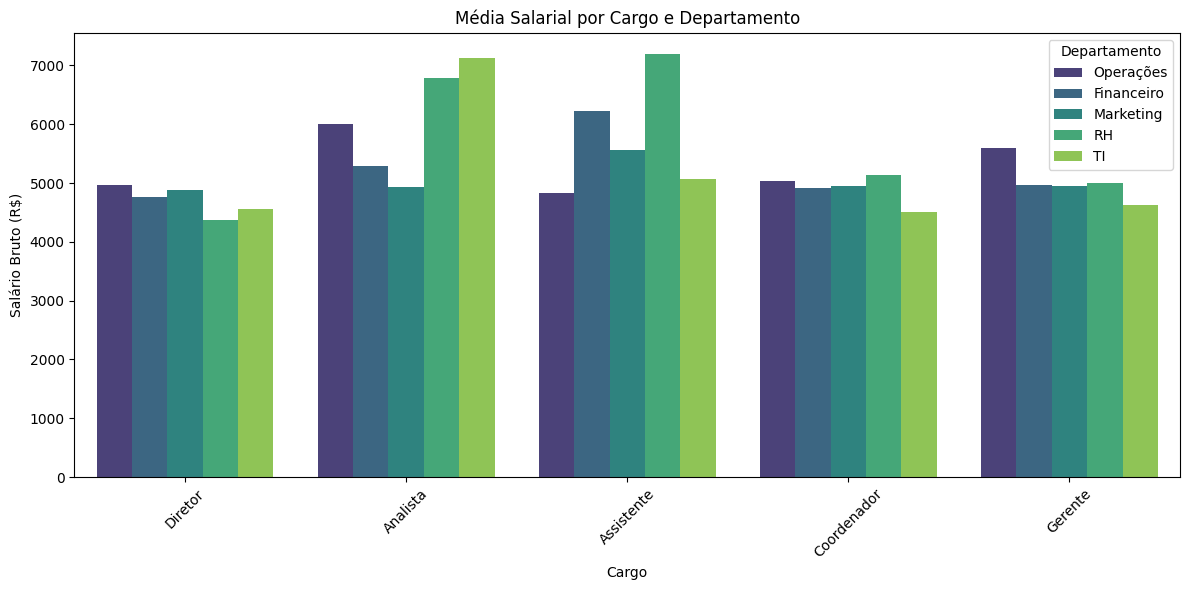

In [ ]:
# Média salarial por cargo e departamento

# Filtrar dados não nulos
df_salario = dataset.dropna(subset=['Salario_Bruto', 'Cargo', 'Departamento'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_salario, x='Cargo', y='Salario_Bruto', hue='Departamento', ci=None, palette='viridis')
plt.title('Média Salarial por Cargo e Departamento')
plt.ylabel('Salário Bruto (R$)')
plt.xticks(rotation=45)
plt.legend(title='Departamento')
plt.tight_layout()
plt.show()

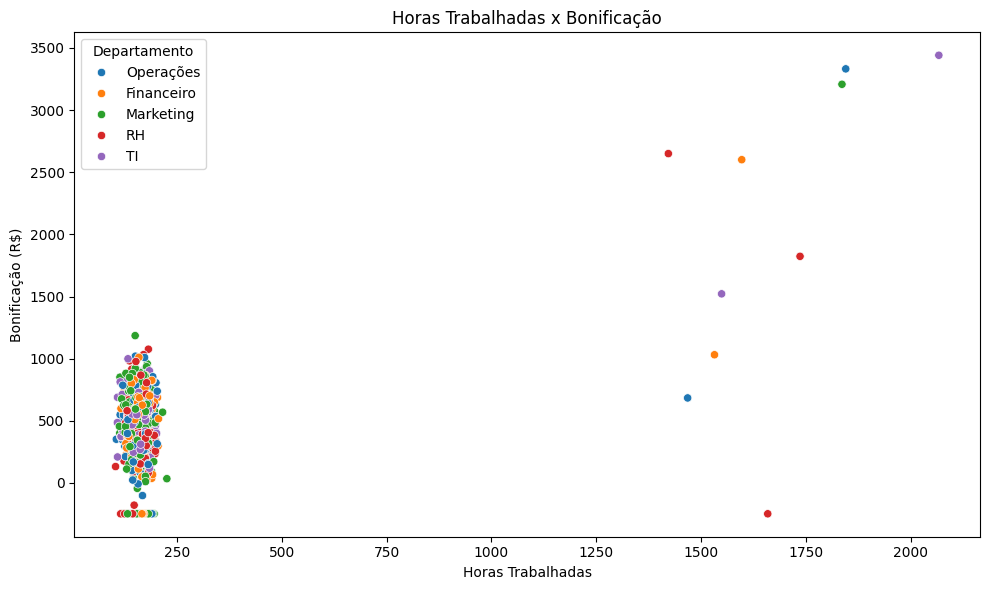

In [ ]:
# Relação entre horas trabalhadas e bonificação

df_corr = dataset.dropna(subset=['Horas_Trabalhadas', 'Bonificacao'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='Horas_Trabalhadas', y='Bonificacao', hue='Departamento')
plt.title('Horas Trabalhadas x Bonificação')
plt.xlabel('Horas Trabalhadas')
plt.ylabel('Bonificação (R$)')
plt.tight_layout()
plt.show()

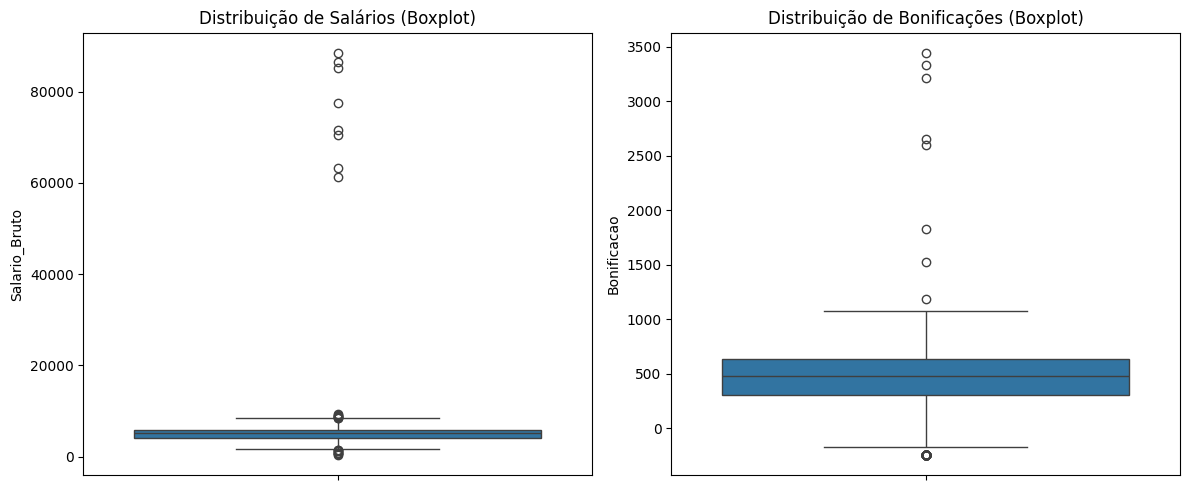

In [ ]:
# Outliers salariais e de bonificação (boxplots)

plt.figure(figsize=(12, 5))

# Salário
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset, y='Salario_Bruto')
plt.title('Distribuição de Salários (Boxplot)')

# Bonificação
plt.subplot(1, 2, 2)
sns.boxplot(data=dataset, y='Bonificacao')
plt.title('Distribuição de Bonificações (Boxplot)')

plt.tight_layout()
plt.show()

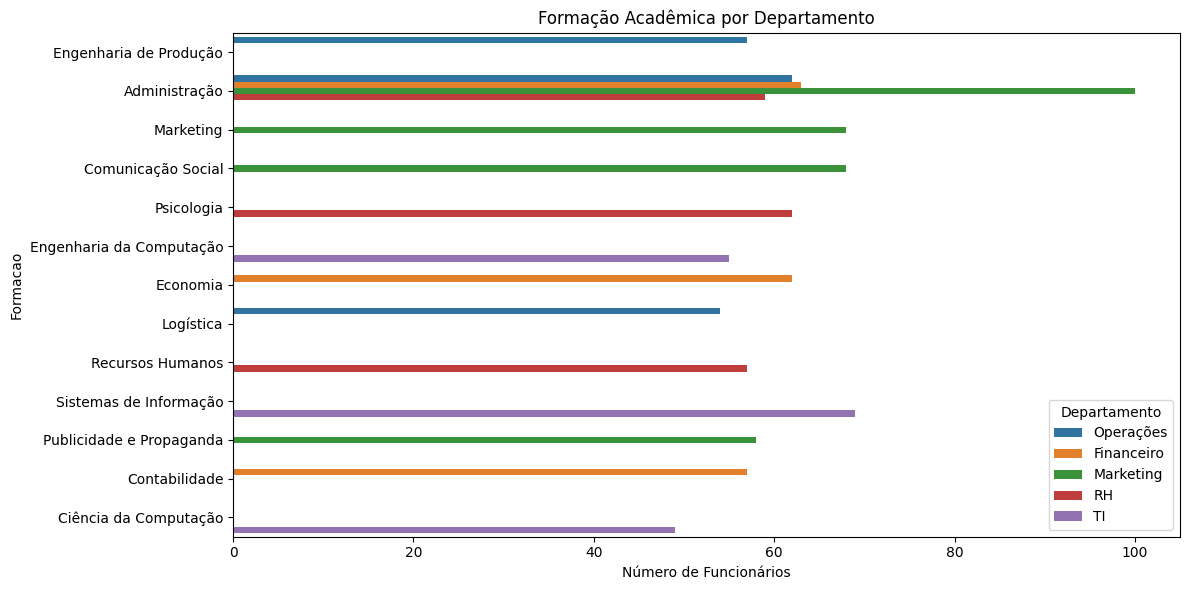

In [ ]:
# Formação predominante por departamento

df_formacao = dataset.dropna(subset=['Formacao', 'Departamento'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df_formacao, y='Formacao', hue='Departamento')
plt.xlabel('Número de Funcionários')
plt.title('Formação Acadêmica por Departamento')
plt.legend(title='Departamento')
plt.tight_layout()
plt.show()


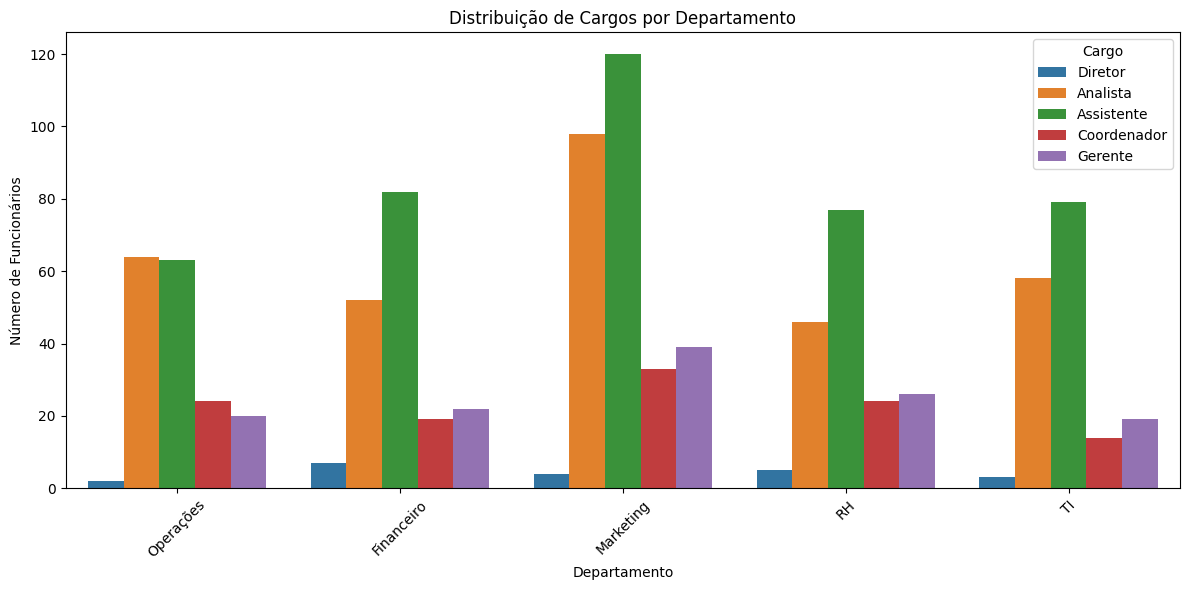

In [ ]:
# Distribuição de cargos entre os departamentos

df_cargo = dataset.dropna(subset=['Cargo', 'Departamento'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cargo, x='Departamento', hue='Cargo')
plt.title('Distribuição de Cargos por Departamento')
plt.ylabel('Número de Funcionários')
plt.legend(title='Cargo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 História 1: Existe relação entre horas trabalhadas e bonificação?
1. Contexto
A empresa deseja entender se o tempo dedicado ao trabalho por mês tem refletido em maiores bonificações. A percepção é que quem trabalha mais deve receber proporcionalmente mais.

2. Exploração e Mensagem
Criamos um gráfico de dispersão entre as variáveis Horas_Trabalhadas e Bonificacao, colorido por departamento.
O que observamos:

Não há uma tendência clara ou linear entre mais horas e mais bonificação.

Alguns funcionários com muitas horas recebem pouca ou nenhuma bonificação.

Existem outliers que distorcem a média e exigem investigação (ex: bonificações negativas ou acima de R$ 2.500,00).

Mensagem: O esforço medido em horas não está sendo diretamente reconhecido com bonificações em todos os departamentos.

3. Chamada para Ação
Revisar a política de bonificações e cruzar com métricas de desempenho reais. Considere critérios mais transparentes e alinhados com o esforço, evitando desmotivação de equipes sobrecarregadas.

📊 História 2: Como estão distribuídos os cargos nos departamentos?
1. Contexto
A liderança quer saber se há equilíbrio na distribuição de cargos por departamento para identificar possíveis gargalos de gestão, acúmulo de funções ou ausência de lideranças em áreas estratégicas.

2. Exploração e Mensagem
Criamos um gráfico de barras segmentado, onde cada departamento mostra a proporção de cargos (ex: analista, coordenador, gerente etc.).
Observações:

O departamento de TI concentra muitos analistas e poucos gerentes, o que pode dificultar a supervisão técnica.

O RH apresenta proporção maior de assistentes, sugerindo uma estrutura mais operacional.

Departamentos como Marketing e Financeiro mostram equilíbrio entre coordenação e execução.

Mensagem: A estrutura de cargos está desalinhada em algumas áreas, o que pode impactar a eficiência e comunicação interna.

3. Chamada para Ação
Revisar organogramas por departamento e avaliar a necessidade de reestruturação. Talvez promover analistas experientes a cargos de coordenação possa gerar melhor suporte técnico e decisões mais ágeis.